This dataset contains the dimensions of a patch antenna, the slots dimensions, 
the operating frequency and finally the corresponding S11 parameter.

Researchers can use this Dataset by any way...like prediction of dimensions by frequency and S11 OR Prediction of S11 by frequency and other dimensions


In [70]:
# Import Desired Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

I am just trying to figure out Antenna dimensions by using its Frequency and Return loss 

# Load Dataset

In [2]:
df = pd.read_csv('dataset_antenna.csv')

In [3]:
df

,Freq(GHz),length of patch in mm,width of patch in mm,Slot length in mm,slot width in mm,s11(dB)
0,1.500000,33.0,33,0.0,0,-4.927274
1,1.551724,33.0,33,0.0,0,-5.077877
2,1.603448,33.0,33,0.0,0,-5.183708
3,1.655172,33.0,33,0.0,0,-5.215997
4,1.706897,33.0,33,0.0,0,-5.120009
...,...,...,...,...,...,...
1261,3.460000,29.4,38,14.0,24,-0.927182
1262,3.470000,29.4,38,14.0,24,-0.936941
1263,3.480000,29.4,38,14.0,24,-0.947290
1264,3.490000,29.4,38,14.0,24,-0.958270


Rename the column  as per our conveniance

In [4]:
df.rename(columns={'s11(dB)':'Return_Loss','Freq(GHz)':'Freq','length of patch in mm':'Patch_length','width of patch in mm':'Patch_Width',
                  'Slot length in mm':'Slot_Length','slot width in mm':'Slot_Width'},inplace=True)

As the owner of dataset said that data is generated using HFSS software, thre are no Null values

In [5]:
df.isnull().sum()

Freq            0
Patch_length    0
Patch_Width     0
Slot_Length     0
Slot_Width      0
Return_Loss     0
dtype: int64

Sort the data according to Frequency

In [6]:
df.sort_values('Freq',ignore_index=True,inplace=True)

The Antenna theory says if the Return Loss is below -10dB then only that antennas have some real applications.

so  if somebody want analysis for real applicatoion research then here is extracted data for you. Thanks...!

In [7]:
df.query('Return_Loss < -10')

,Freq,Patch_length,Patch_Width,Slot_Length,Slot_Width,Return_Loss
383,2.017241,31.0,32,85.0,115,-10.808005
415,2.068966,31.0,32,85.0,115,-12.211868
452,2.120690,31.0,32,85.0,115,-13.376440
485,2.172414,31.0,32,85.0,115,-14.659719
516,2.224138,31.0,32,85.0,115,-16.282618
517,2.224138,33.0,33,0.0,0,-10.202952
548,2.275862,31.0,32,85.0,115,-18.499373
549,2.275862,33.0,33,0.0,0,-13.254084
580,2.327586,33.0,33,0.0,0,-12.229729
581,2.327586,31.0,32,85.0,115,-21.650557


Check the relation of each parameter of antenna with Return Loss

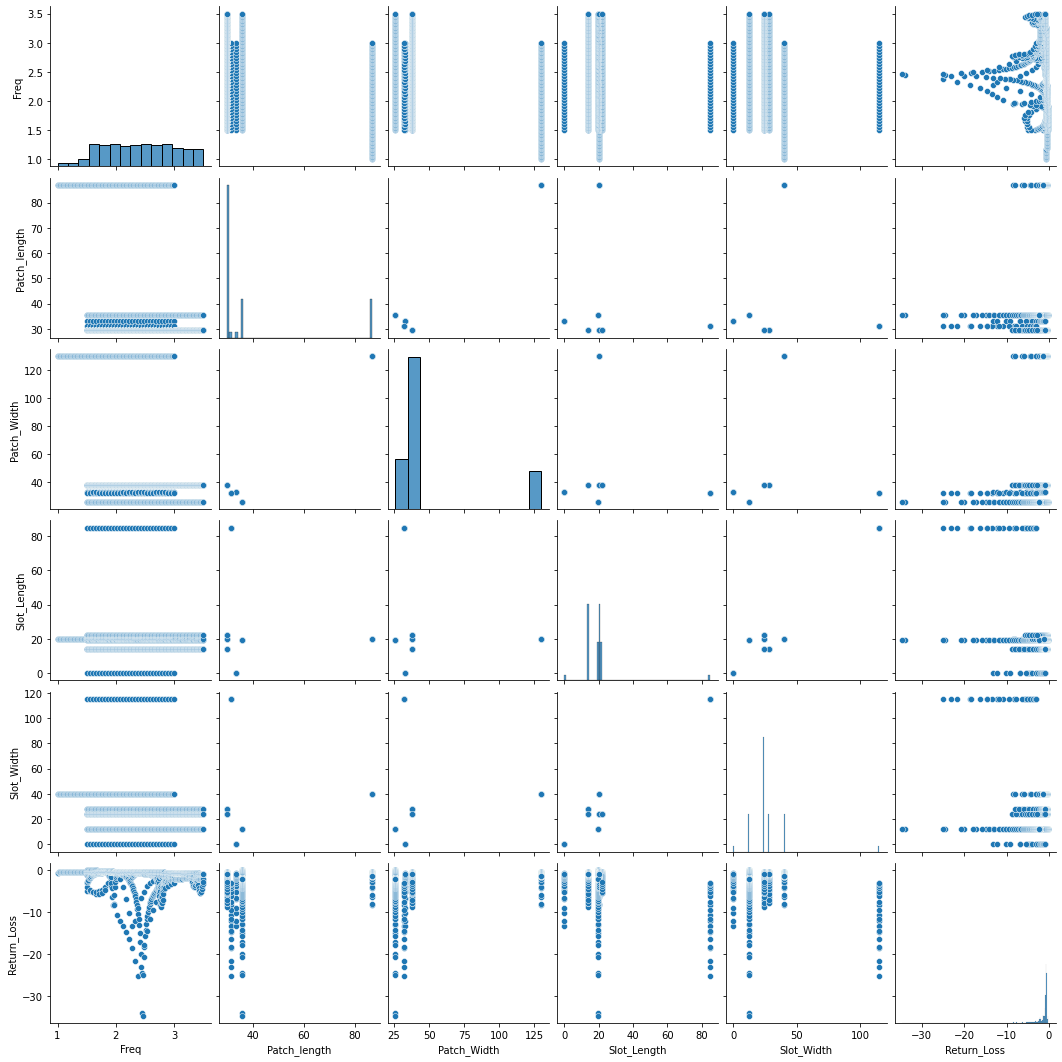

In [8]:
sns.pairplot(df)

Figure shows that antenna has bandwidth around 2.4GHz

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Freq', ylabel='Return_Loss'>

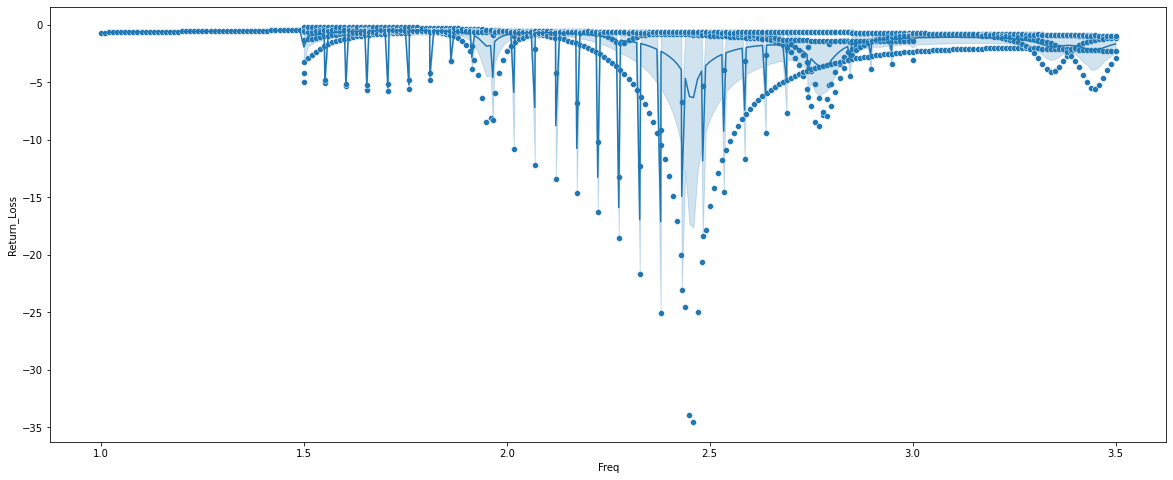

In [9]:
plt.figure(figsize=(20,8))
sns.scatterplot(df.Freq,df.Return_Loss)
sns.lineplot(df.Freq,df.Return_Loss)

check the  frequencies around 2.4GHz

In [10]:
df.query('Freq > 2.3 & Freq < 2.5')

,Freq,Patch_length,Patch_Width,Slot_Length,Slot_Width,Return_Loss
568,2.31,87.0,130,20.0,40,-0.693906
569,2.31,35.5,26,19.5,12,-5.181679
570,2.31,29.4,38,22.0,24,-0.629618
571,2.31,29.4,38,14.0,28,-0.590434
572,2.31,29.4,38,14.0,24,-0.616982
...,...,...,...,...,...,...
685,2.49,29.4,38,14.0,28,-0.665129
686,2.49,29.4,38,14.0,24,-0.701276
687,2.49,29.4,38,20.0,24,-0.628530
688,2.49,87.0,130,20.0,40,-0.910903


In [11]:
df.Freq.nunique()

279

In [12]:
df.Freq.max()

3.5

# Create Model by Random Forest Algorithm

# Random Forest

In [13]:
df

,Freq,Patch_length,Patch_Width,Slot_Length,Slot_Width,Return_Loss
0,1.00,87.0,130,20.0,40,-0.688908
1,1.01,87.0,130,20.0,40,-0.665553
2,1.02,87.0,130,20.0,40,-0.648568
3,1.03,87.0,130,20.0,40,-0.636214
4,1.04,87.0,130,20.0,40,-0.627207
...,...,...,...,...,...,...
1261,3.50,35.5,26,19.5,12,-2.292020
1262,3.50,29.4,38,20.0,24,-1.118060
1263,3.50,29.4,38,22.0,24,-2.900641
1264,3.50,29.4,38,14.0,28,-1.010659


Separate Input and Output

In [14]:
xr = df.iloc[:,[0,-1]] 

In [15]:
yr = df.iloc[:,1:5]

Split Training and Testing Data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xr_train,xr_test,yr_train,yr_test = train_test_split(xr,yr,test_size=0.2,random_state=42)

In [49]:
xr_train

array([[-1.80589385,  0.39054997],
       [-1.24221994,  0.39259084],
       [ 0.2332794 ,  0.35996734],
       ...,
       [ 1.36062721,  0.23982041],
       [ 0.58143093,  0.11351896],
       [ 1.36062721,  0.29870838]])

Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scr = StandardScaler() 

In [20]:
xr_train = scr.fit_transform(xr_train)

In [21]:
xr_test = scr.fit_transform(xr_test)

Apply Random forest Regressor

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
rf = RandomForestRegressor()

In [24]:
rf.fit(xr_train,yr_train)

RandomForestRegressor()

In [25]:
rf.predict(xr_test)

array([[ 29.888,  37.04 ,  20.54 ,  23.04 ],
       [ 29.4  ,  38.   ,  14.   ,  24.68 ],
       [ 65.187,  86.68 ,  19.805,  28.6  ],
       ...,
       [ 84.696, 126.32 ,  20.   ,  39.36 ],
       [ 30.613,  39.72 ,  14.255,  24.32 ],
       [ 44.376,  61.92 ,  21.26 ,  28.2  ]])

check training score

In [26]:
rf.score(xr_train,yr_train) * 100

91.24337282230562

In [27]:
df.query('Freq == 2.4')

,Freq,Patch_length,Patch_Width,Slot_Length,Slot_Width,Return_Loss
626,2.4,29.4,38,14.0,28,-0.615066
627,2.4,29.4,38,20.0,24,-0.673970
628,2.4,87.0,130,20.0,40,-0.788554
629,2.4,35.5,26,19.5,12,-13.108028
630,2.4,29.4,38,14.0,24,-0.643529
631,2.4,29.4,38,22.0,24,-0.617459


get some Predictions

In [33]:
yr_pred = rf.predict(xr_test)

In [28]:
rf.predict([[2.4,-15]])# frequency 2.4GHz and Return Loss is -15 dB

array([[31.883, 32.06 , 44.215, 53.95 ]])

In [29]:
rf.predict([[2.4,-30]]) # frequency 2.4GHz and Return Loss is -30 dB

array([[31.883, 32.06 , 44.215, 53.95 ]])

In [30]:
rf.predict([[2.4,-10]]) # frequency 2.4GHz and Return Loss is -10 dB

array([[31.883, 32.06 , 44.215, 53.95 ]])

# Check for Errors and Accuracy

In [39]:
# yr_test
yr_pred.dtype

dtype('float64')

In [62]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [59]:
mse =  mean_squared_error(yr_test,yr_pred)

In [61]:
print("The Mean Squared Error of Model:",mse)

The Mean Squared Error of MOdel: 195.25539317716533


In [71]:
print("The Root Mean Squared Error of Model:",np.sqrt(mse))

The Root Mean Squared Error of Model: 13.97338159420136


In [72]:
mae = mean_absolute_error(yr_test,yr_pred)

In [73]:
print("The Mean Absolute Error of Model:",mae)

The Mean Absolute Error of Model: 5.300877952755912


In [74]:
# Calculate the absolute errors
errors = abs(yr_pred - yr_test)

In [81]:
# Print out the mean absolute error (mae)
print('Mean Absolute Errors for each parameter:\n',round(np.mean(errors), 2))


Mean Absolute Errors for each parameter:
 Patch_length    4.26
Patch_Width     7.15
Slot_Length     3.98
Slot_Width      5.81
dtype: float64


In [85]:
# Calculate mean absolute percentage error (MAPE)
print('Mean Absolute Errors for each parameter:\n',round((np.mean(errors)/yr_test)*100, 2))

Mean Absolute Errors for each parameter:
       Patch_length  Patch_Width  Slot_Length  Slot_Width
1210         14.48        18.83        18.08       24.22
1039         14.48        18.83        28.41       20.76
422          12.00        27.51        20.40       48.45
1118         14.48        18.83        28.41       24.22
848          13.74        22.36         4.68        5.06
...            ...          ...          ...         ...
163          14.48        18.83        18.08       24.22
486          14.48        18.83        28.41       20.76
624           4.89         5.50        19.89       14.53
221          14.48        18.83        28.41       24.22
243          14.48        18.83        18.08       24.22

[254 rows x 4 columns]
